# Praktek TF-IDF

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('clean_dataset_film_stem.csv',sep=';')

In [3]:
dataset.shape

(200, 10)

In [4]:
dataset.head(3)

,Unnamed: 0.1,Unnamed: 0,Sentiment,Text Tweet,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek filmnya apalagi si ernest gak mutu bgt a...,"['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...","['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...",jelek filmnya apalagi si ernest gak mutu bgt a...,jelek filmnya apalagi si ernest gak mutu bgt a...,jelek film si ernest gak mutu bgt actingnya fi...
1,1,1,negative,Film king Arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,"['film', 'king', 'arthur', 'ini', 'film', 'pal...","['film', 'king', 'arthur', 'ini', 'film', 'pal...",film king arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,film king arthur film paling jelek seluruh cer...
2,2,2,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,bee sepanjang film gwa berkata kasar terus pad...,"['bee', 'sepanjang', 'film', 'gwa', 'berkata',...","['bee', 'sepanjang', 'film', 'gwa', 'berkata',...",bee sepanjang film gwa berkata kasar terus pad...,bee sepanjang film gwa berkata kasar terus pad...,bee panjang film gwa kata kasar terus bapak


In [5]:
map = {'negative':0,'positive':1}
dataset.replace({'Sentiment' : map},inplace = True)

In [6]:
dataset.head(3)

,Unnamed: 0.1,Unnamed: 0,Sentiment,Text Tweet,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,0,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek filmnya apalagi si ernest gak mutu bgt a...,"['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...","['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...",jelek filmnya apalagi si ernest gak mutu bgt a...,jelek filmnya apalagi si ernest gak mutu bgt a...,jelek film si ernest gak mutu bgt actingnya fi...
1,1,1,0,Film king Arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,"['film', 'king', 'arthur', 'ini', 'film', 'pal...","['film', 'king', 'arthur', 'ini', 'film', 'pal...",film king arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,film king arthur film paling jelek seluruh cer...
2,2,2,0,@beexkuanlin Sepanjang film gwa berkata kasar ...,bee sepanjang film gwa berkata kasar terus pad...,"['bee', 'sepanjang', 'film', 'gwa', 'berkata',...","['bee', 'sepanjang', 'film', 'gwa', 'berkata',...",bee sepanjang film gwa berkata kasar terus pad...,bee sepanjang film gwa berkata kasar terus pad...,bee panjang film gwa kata kasar terus bapak


In [7]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [8]:
dataset_feature

0      jelek film si ernest gak mutu bgt actingnya fi...
1      film king arthur film paling jelek seluruh cer...
2            bee panjang film gwa kata kasar terus bapak
3      ane ga suka fast and furious turut kok jelek t...
4      baekhyun kan gua ga tau film lu bilang perang ...
                             ...                        
195    fargo adaptasi film cukup hasil season the bes...
196    waw sangat keren flm horor dng jumlah tonton g...
197    filmziarah film tenang hanyut salut mbah ponco...
198    film amat tarik kisah cinta setia saji tidak b...
199    nntn filmziarah film bagus kali menit tonton g...
Name: ProcessedText, Length: 200, dtype: object

In [9]:
dataset_label = dataset['Sentiment']

In [10]:
dataset_label

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Sentiment, Length: 200, dtype: int64

## cek distribusi label

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_8716\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


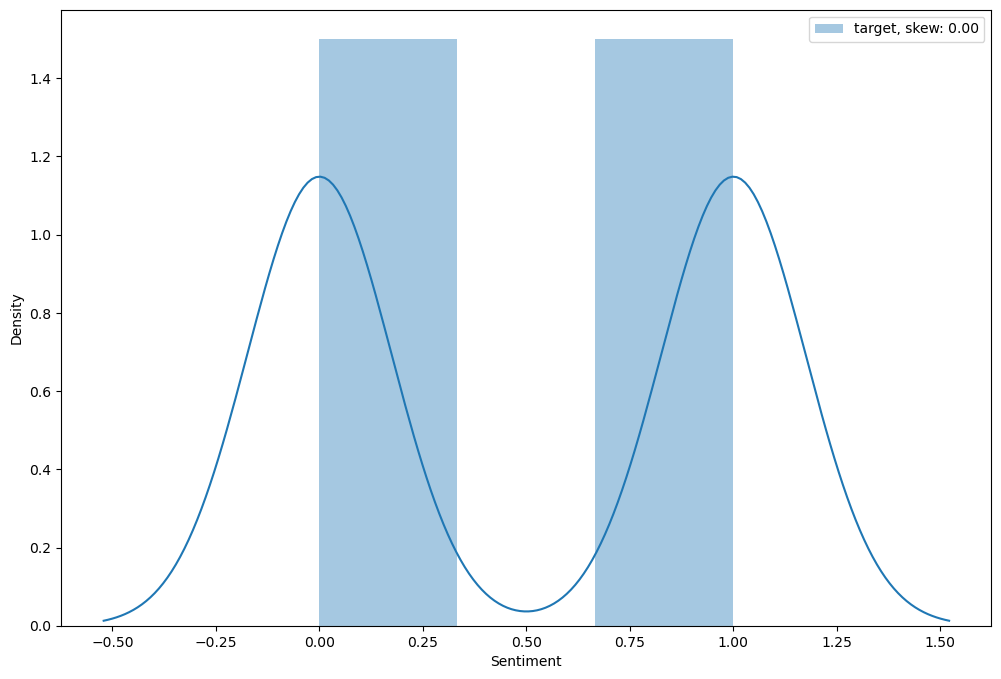

In [12]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [13]:
dataset_label.value_counts()

0    100
1    100
Name: Sentiment, dtype: int64

## TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer()

### Positive 

In [16]:
positive_reviews = dataset[(dataset["Sentiment"] == 1)]
negative_reviews = dataset[(dataset["Sentiment"] == 0)]

In [17]:
positive_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Sentiment,Text Tweet,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
100,100,100,1,"Keren bang flm lo @radityadika persahabatan, k...",keren bang flm lo radityadika persahabatan kel...,"['keren', 'bang', 'flm', 'lo', 'radityadika', ...","['keren', 'bang', 'flm', 'lo', 'radityadika', ...",keren bang flm lo radityadika persahabatan kel...,keren bang flm lo radityadika persahabatan kel...,keren bang flm lo radityadika sahabat keluarga...
101,101,101,1,Habis nonton film Kong: Skull Island 2017. Lum...,habis nonton film kong skull island lumayan ...,"['habis', 'nonton', 'film', 'kong', 'skull', '...","['habis', 'nonton', 'film', 'kong', 'skull', '...",habis nonton film kong skull island lumayan gr...,habis nonton film kong skull island lumayan gr...,habis nonton film kong skull island lumayan gr...
102,102,102,1,"Bravo untuk #filmkartini! Pemainnya bagus, sud...",bravo untuk pemainnya bagus sudut pandang ceri...,"['bravo', 'untuk', 'pemainnya', 'bagus', 'sudu...","['bravo', 'untuk', 'pemainnya', 'bagus', 'sudu...",bravo untuk pemainnya bagus sudut pandang ceri...,bravo untuk pemainnya bagus sudut pandang ceri...,bravo main bagus sudut pandang cerita tarik fi...
103,103,103,1,Abis nonton film #kartini. Bagussss bgt! Dr aw...,abis nonton film bagussss bgt dr awal sampe ak...,"['abis', 'nonton', 'film', 'bagussss', 'bgt', ...","['abis', 'nonton', 'film', 'bagussss', 'bgt', ...",abis nonton film bagussss bgt dr awal sampe ak...,abis nonton film bagussss bgt dr awal sampe ak...,abis nonton film bagussss bgt dr awal sampe ak...
104,104,104,1,#RomanHarusBertahan bangga menyukai film yg me...,bangga menyukai film yg mengandung bnyak makna...,"['bangga', 'menyukai', 'film', 'yg', 'mengandu...","['bangga', 'menyukai', 'film', 'yg', 'mengandu...",bangga menyukai film yg mengandung bnyak makna...,bangga menyukai film yg mengandung bnyak makna...,bangga suka film kandung bnyak makna sperti ro...


In [18]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

In [19]:
Positive_tf_idf.shape

(100, 1681)

In [20]:
features = Positive_tf_idf_vect.get_feature_names_out()

In [21]:
idfValues = Positive_tf_idf_vect.idf_

In [22]:
d = dict(zip(features, 9 - idfValues))

In [23]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [24]:
for i in range(200):
    print(sortedDict[i])

('film', 7.917478976311997)
('nonton', 6.818866687643887)
('tonton', 6.603755308026941)
('keren', 6.429401920882164)
('bagus', 6.3293184623251815)
('kartini', 6.2180928272149565)
('banget', 6.157468205398522)
('indonesia', 6.023936812773999)
('the', 6.023936812773999)
('film kartini', 5.9498288406202775)
('guys', 5.9498288406202775)
('nonton film', 5.869786132946741)
('the guys', 5.869786132946741)
('bikin', 5.782774755957111)
('film bagus', 5.782774755957111)
('sangat', 5.782774755957111)
('banyak', 5.687464576152786)
('radityadika', 5.687464576152786)
('buat', 5.582104060494959)
('film the', 5.582104060494959)
('sama', 5.582104060494959)
('satu', 5.582104060494959)
('bang', 5.4643210248385765)
('film indonesia', 5.4643210248385765)
('film keren', 5.4643210248385765)
('gak', 5.4643210248385765)
('hanungbramantyo', 5.4643210248385765)
('akhir', 5.330789632214054)
('baik', 5.330789632214054)
('cinta', 5.330789632214054)
('danur', 5.330789632214054)
('hasil', 5.330789632214054)
('salah',

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [26]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

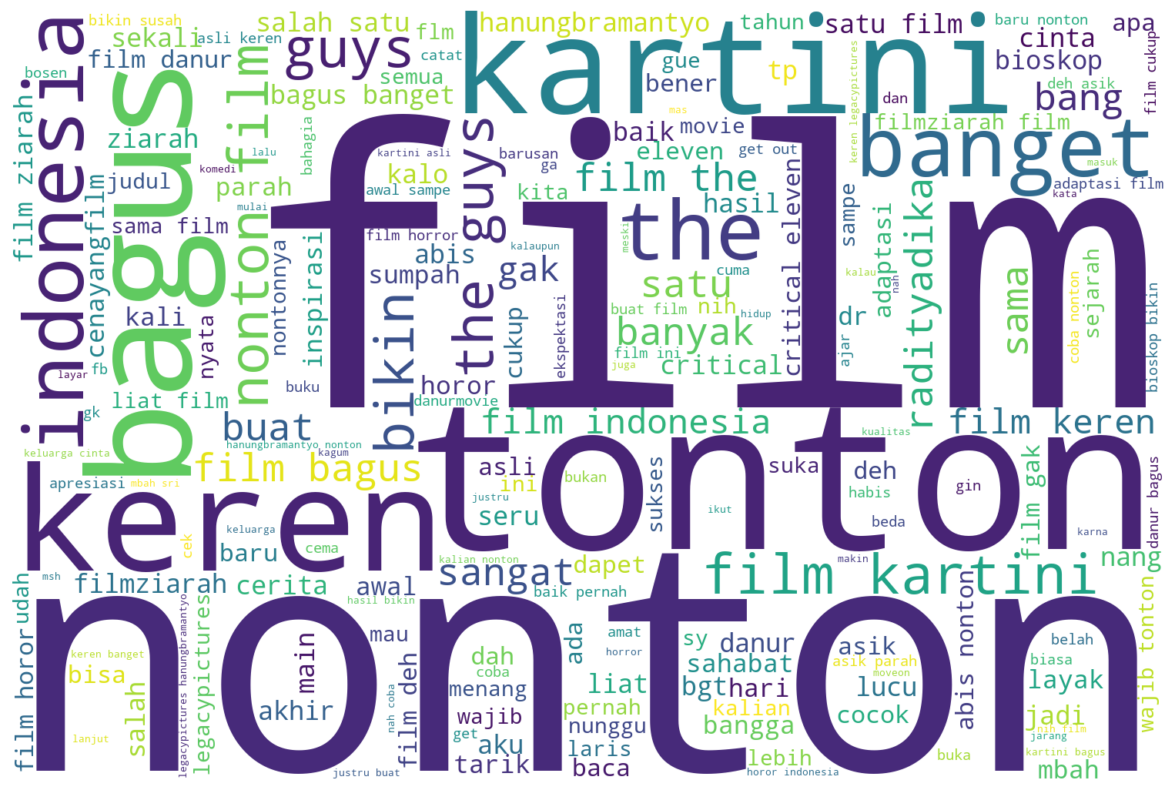

In [27]:
PlotWordCloud(d)

### Negative

In [28]:
negative_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Sentiment,Text Tweet,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,0,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek filmnya apalagi si ernest gak mutu bgt a...,"['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...","['jelek', 'filmnya', 'apalagi', 'si', 'ernest'...",jelek filmnya apalagi si ernest gak mutu bgt a...,jelek filmnya apalagi si ernest gak mutu bgt a...,jelek film si ernest gak mutu bgt actingnya fi...
1,1,1,0,Film king Arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,"['film', 'king', 'arthur', 'ini', 'film', 'pal...","['film', 'king', 'arthur', 'ini', 'film', 'pal...",film king arthur ini film paling jelek dari se...,film king arthur ini film paling jelek dari se...,film king arthur film paling jelek seluruh cer...
2,2,2,0,@beexkuanlin Sepanjang film gwa berkata kasar ...,bee sepanjang film gwa berkata kasar terus pad...,"['bee', 'sepanjang', 'film', 'gwa', 'berkata',...","['bee', 'sepanjang', 'film', 'gwa', 'berkata',...",bee sepanjang film gwa berkata kasar terus pad...,bee sepanjang film gwa berkata kasar terus pad...,bee panjang film gwa kata kasar terus bapak
3,3,3,0,Ane ga suka fast and furious..menurutku kok je...,ane ga suka fast and furious menurutku kok jel...,"['ane', 'ga', 'suka', 'fast', 'and', 'furious'...","['ane', 'ga', 'suka', 'fast', 'and', 'furious'...",ane ga suka fast and furious menurutku kok jel...,ane ga suka fast and furious menurutku kok jel...,ane ga suka fast and furious turut kok jelek t...
4,4,4,0,"@baekhyun36 kan gua ga tau film nya, lu bilang...",baekhyun kan gua ga tau film nya lu bilang per...,"['baekhyun', 'kan', 'gua', 'ga', 'tau', 'film'...","['baekhyun', 'kan', 'gua', 'ga', 'tau', 'film'...",baekhyun kan gua ga tau film nya lu bilang per...,baekhyun kan gua ga tau film nya lu bilang per...,baekhyun kan gua ga tau film lu bilang perang ...


In [29]:
Negative_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Negative_tf_idf = Negative_tf_idf_vect.fit_transform(negative_reviews["ProcessedText"].values)

In [30]:
Negative_tf_idf.shape

(100, 1457)

In [31]:
features = Negative_tf_idf_vect.get_feature_names_out()

In [32]:
idfValues = Negative_tf_idf_vect.idf_

In [33]:
d = dict(zip(features, 9 - idfValues))

In [34]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [35]:
for i in range(200):
    print(sortedDict[i])

('film', 7.990049669146832)
('nonton', 6.752175313145214)
('kecewa', 6.603755308026941)
('nonton film', 6.380611756712732)
('jelek', 6.3293184623251815)
('ga', 6.023936812773999)
('jadi', 6.023936812773999)
('sama', 6.023936812773999)
('kurang', 5.782774755957111)
('aja', 5.687464576152786)
('bagus', 5.687464576152786)
('bikin', 5.687464576152786)
('sama film', 5.687464576152786)
('tonton', 5.687464576152786)
('parah', 5.582104060494959)
('the', 5.582104060494959)
('nyata', 5.4643210248385765)
('banget', 5.330789632214054)
('banyak', 5.330789632214054)
('bilang', 5.330789632214054)
('film jelek', 5.330789632214054)
('gue', 5.330789632214054)
('hambar', 5.330789632214054)
('suka', 5.330789632214054)
('aku', 5.176638952386796)
('apa', 5.176638952386796)
('baru', 5.176638952386796)
('bgt', 5.176638952386796)
('biasa', 5.176638952386796)
('danur', 5.176638952386796)
('film the', 5.176638952386796)
('gak', 5.176638952386796)
('jelas', 5.176638952386796)
('kartini', 5.176638952386796)
('mumm

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [37]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

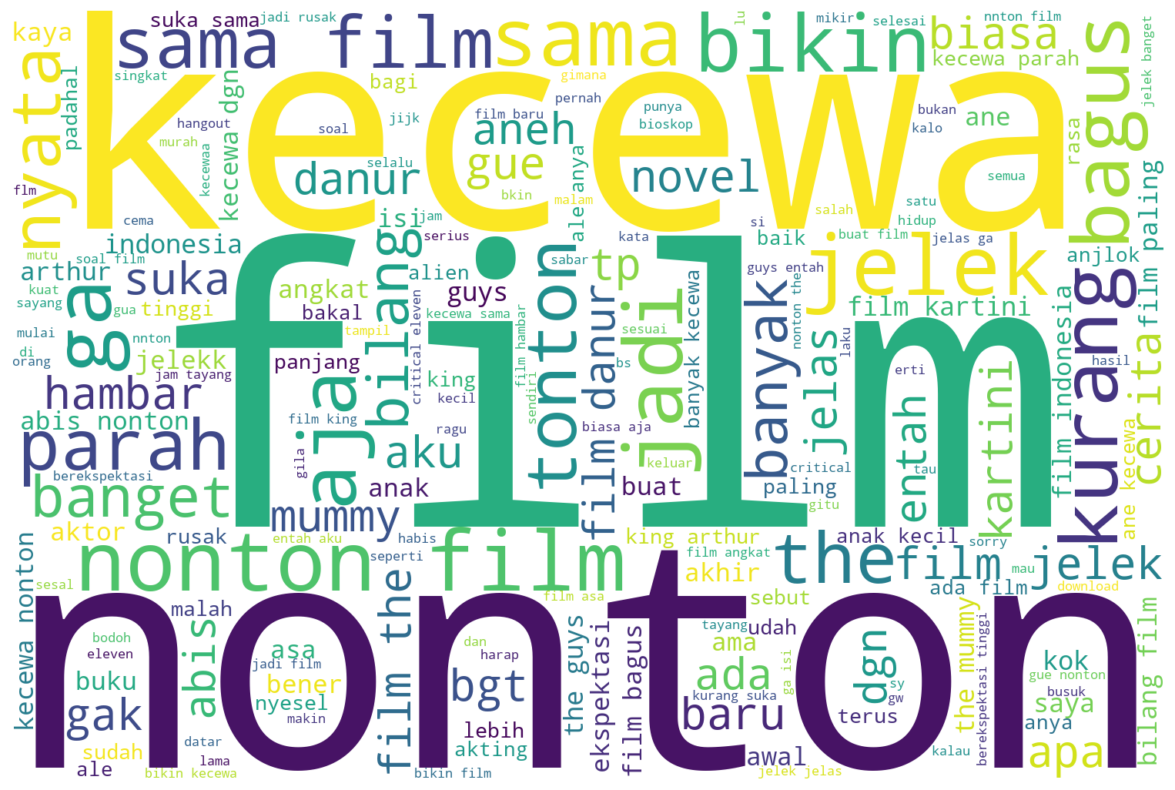

In [38]:
PlotWordCloud(d)